# About

Sentiment Analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine.

# Solving Problem

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing Training and test files!!

In [2]:
df=pd.read_csv('F:\\train_E6oV3lV.csv')
df=df.drop('id',1)
test=pd.read_csv('F:\\test_tweets_anuFYb8.csv')
test=test.drop('id',1)
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# EDA

In [3]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [4]:
df[df['label']==1].head()

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...


In [5]:
test['tweet'].head()

0    #studiolife #aislife #requires #passion #dedic...
1     @user #white #supremacists want everyone to s...
2    safe ways to heal your #acne!!    #altwaystohe...
3    is the hp and the cursed child book up for res...
4      3rd #bihday to my amazing, hilarious #nephew...
Name: tweet, dtype: object

In [6]:
test.shape

(17197, 1)

In [7]:
df.shape

(31962, 2)

# Visualization

(array([1.293e+03, 3.273e+03, 4.485e+03, 5.680e+03, 2.249e+03, 1.690e+02,
        2.400e+01, 1.000e+01, 8.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 11. ,  38.4,  65.8,  93.2, 120.6, 148. , 175.4, 202.8, 230.2,
        257.6, 285. , 312.4, 339.8, 367.2, 394.6, 422. , 449.4, 476.8,
        504.2, 531.6, 559. ]),
 <a list of 20 Patch objects>)

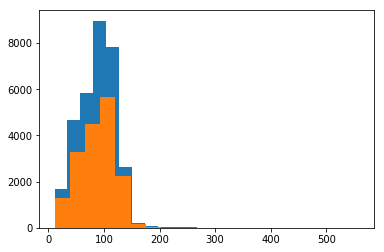

In [8]:
df_len=df['tweet'].str.len()
test_len=test['tweet'].str.len()
plt.hist(df_len,bins=20,label='train_text')
plt.hist(test_len,bins=20,label='test_text')

In [9]:
from wordcloud import WordCloud

In [10]:
df_text=' '.join([x for x in df['tweet']])

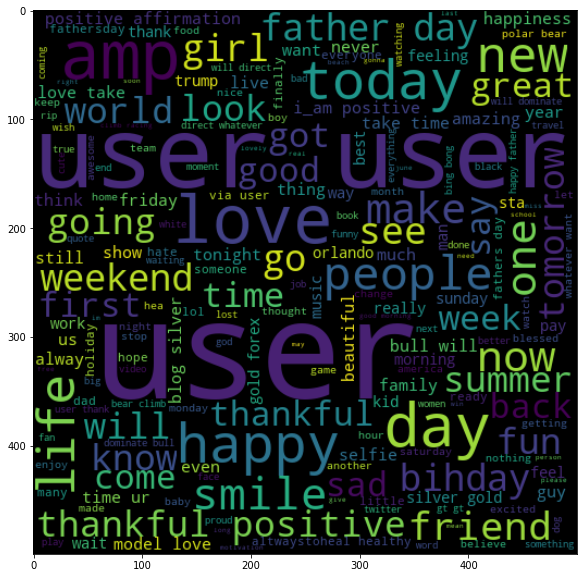

In [11]:
cloud=WordCloud(width=500,height=500).generate(df_text)
plt.figure(figsize=(10,10))
plt.imshow(cloud,interpolation='bilinear')

# Preprocessing

In [12]:
#removing numbers and puncuations
df['tweet']=df['tweet'].str.replace('[^a-zA-Z@#]',' ')
test['tweet']=test['tweet'].str.replace('[^a-zA-Z@#]',' ')

In [13]:
df['tweet']=df['tweet'].str.replace('@[\w]*','')

In [14]:
test['tweet']=test['tweet'].str.replace('@[\w]*','')
df.head()

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can t use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide society now #motivation


In [15]:
#removing smaller words
df['tweet']=df['tweet'].apply(lambda x:' '.join([word for word in x.split() if len(word)>3]))
test['tweet']=test['tweet'].apply(lambda x:' '.join([word for word in x.split() if len(word)>3]))

In [16]:
#making all words lowercase
df['tweet']=df['tweet'].apply(lambda x:x.lower())
test['tweet']=test['tweet'].apply(lambda x:x.lower())

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english',max_features=1000,min_df=2)
tf.fit(df['tweet'])
df_tf=pd.DataFrame(tf.transform(df['tweet']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
df=df.join(df_tf)
df=df.drop('tweet',1)

In [18]:
#tf.fit(test['tweet'])
test_tf=pd.DataFrame(tf.transform(test['tweet']).toarray(),columns=tf.get_feature_names()).add_prefix('tfidf_')
test=test.join(test_tf)
test=test.drop('tweet',1)

In [19]:
df.shape

(31962, 1001)

In [20]:
test.shape

(17197, 1000)

# Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [22]:
x=df.drop('label',1)
y=df['label']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=3,n_jobs=-1)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9414341133775498

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.9449380553122263

In [51]:
y_test=gb.predict(test)

In [52]:
sub=pd.read_csv('F:\\sample_submission_gfvA5FD.csv')
sub.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [53]:
sub['label']=y_test

In [54]:
sub['label'].value_counts()

0    16809
1      388
Name: label, dtype: int64

In [55]:
sub.to_csv('F:\\answer.csv',index=False)

In [56]:
sub

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
5,31968,0
6,31969,0
7,31970,0
8,31971,0
9,31972,0
